## FCC Linear Regression Health Costs Calculator (ML with Python Project)

In this challenge, you will predict healthcare costs using a regression algorithm.

You are given a dataset that contains information about different people including their healthcare costs. Use the data to predict healthcare costs based on new data.

The first two cells of this notebook import libraries and the data.

Make sure to:

1. Preprocess data:
  - Convert categorical data to numbers.
  - Use 80% of the data as the ```train_dataset``` and 20% of the data as the ```test_dataset```.

2. Split data between features and labels:
  - ```pop``` off the "expenses" column from these datasets to create new datasets called ```train_labels``` and ```test_labels```.
  - Use these labels when training your model.

3. Create a model and train it with the ```train_dataset```.

4. Run the final cell in this notebook to check your model. The final cell will use the unseen ```test_dataset``` to check how well the model generalizes.

To pass the challenge, ```model.evaluate``` must return a Mean Absolute Error of under 3500. This means it predicts health care costs correctly within $3500.

The final cell will also predict expenses using the ```test_dataset``` and graph the results.

**Link:** https://www.freecodecamp.org/learn/machine-learning-with-python/machine-learning-with-python-projects/linear-regression-health-costs-calculator

### 1. Import Libraries

In [1]:
# Import libraries. You may or may not use all of these.
!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


### 2. Import Data

In [2]:
# Import data
!wget -nc https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
df = pd.read_csv('insurance.csv')
df.tail()

File ‘insurance.csv’ already there; not retrieving.



,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


### 3. Insert Your Code Here

#### Know Your Data (Basic Info)

In [3]:
#df.head()
df.tail()

,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [4]:
df.shape # 1338 entries and 7 features

(1338, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.00,27.0000,39.00,51.000,64.00
bmi,1338.0,30.665471,6.098382,16.00,26.3000,30.40,34.700,53.10
children,1338.0,1.094918,1.205493,0.00,0.0000,1.00,2.000,5.00
expenses,1338.0,13270.422414,12110.011240,1121.87,4740.2875,9382.03,16639.915,63770.43


In [8]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

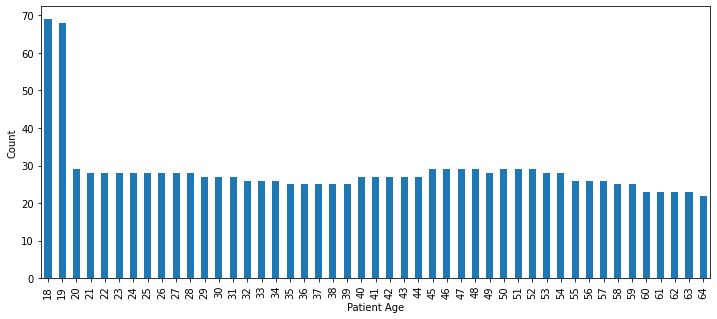

In [9]:
# Number of patients for each age (from 18 to 64 years old)
df['age'].value_counts().sort_index(ascending=True).plot(kind='bar', figsize=(12,5), xlabel='Patient Age', ylabel='Count')

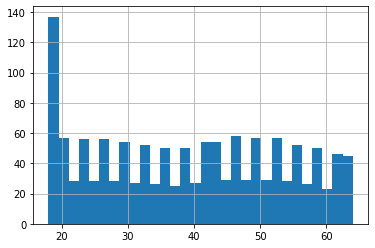

In [10]:
# Patients age frequency (histogram)
df.age.hist(bins=30)

female    662
male      676
Name: sex, dtype: int64


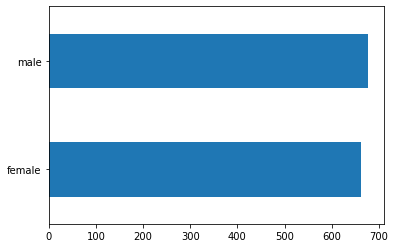

In [11]:
# Number of patients per sex
print(df['sex'].value_counts(sort=False, ascending=True))
df.sex.value_counts(sort=False, ascending=True).plot(kind='barh')

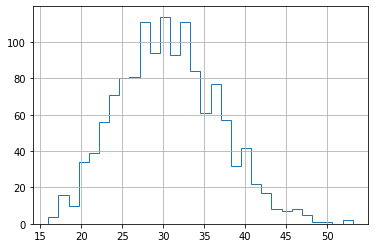

In [12]:
# Patients bmi frequency (histogram)
#df.bmi.hist(bins=30, histtype='bar')
df.bmi.hist(bins=30, histtype='step')

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


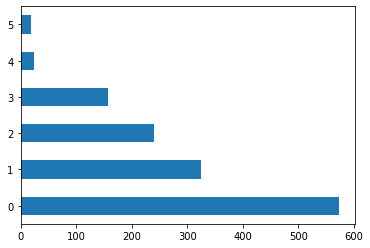

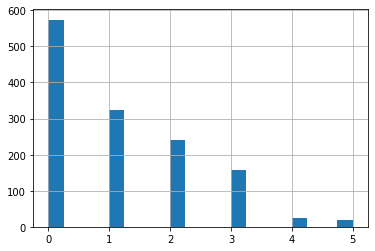

In [13]:
# Number of children each patient has
print(df['children'].value_counts())
df.children.value_counts().plot(kind='barh')
plt.show()
df.children.hist(bins=20)
plt.show()

no     1064
yes     274
Name: smoker, dtype: int64


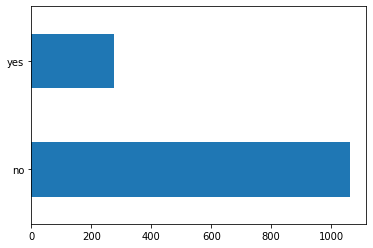

In [14]:
# Number of smoking and not-smoking patients
print(df['smoker'].value_counts())
df['smoker'].value_counts().plot(kind='barh')

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


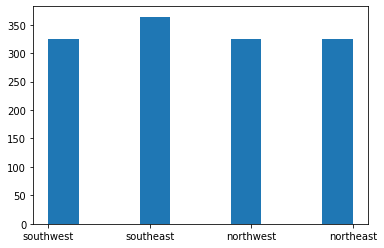

In [15]:
# Number of patients per region
print(df['region'].value_counts())
df['region'].hist(bins=10, grid=False)

count     1338.000000
mean     13270.422414
std      12110.011240
min       1121.870000
25%       4740.287500
50%       9382.030000
75%      16639.915000
max      63770.430000
Name: expenses, dtype: float64


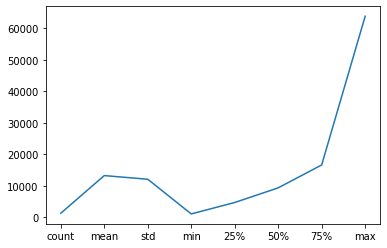

In [16]:
# Patient health cost expenses
print(df['expenses'].describe())
df['expenses'].describe().plot(kind='line')

##### Special Plot

In [17]:
# Review the joint distribution of a few pairs of columns from the training set
#import seaborn as sns
#sns.pairplot(train_dataset[df.columns.to_list()], diag_kind='kde')

#### Auxiliary Variables/Functions

In [18]:
# Make NumPy printouts easier to read
#np.set_printoptions(precision=3, suppress=True)

# Store [loss, mae, mse, fit] model evaluation results for later comparison
test_results = {}

# Store [ model, history, test_features, test_labels, fit ] for easier access
models_data = {}

In [19]:
# Plot loss and val_loss
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 15_000])
  plt.xlabel('Epoch')
  plt.ylabel('Error [expenses]')
  plt.legend()
  plt.grid(True)

In [20]:
def plot_models_history(models_data):
  n_models = len(models_data)
  
  i = 0
  fig, axes = plt.subplots(nrows=1, ncols=n_models, figsize=(8, 4),
      sharey=True, tight_layout=True)
  fig.text(0.53, -0.02, 'Epoch', ha='center', fontsize='large')
  fig.text(-0.01, 0.5, 'Error [expenses]', va='center', rotation='vertical', fontsize='large')
  
  for m in models_data:

    history = models_data[m][1]

    axes[i].set_title(m, fontsize='x-large')
    axes[i].plot(
        history.history['loss'],
        color='tab:blue', marker=None, markersize=None,
        linestyle='-', linewidth=2,
        label='loss')
    axes[i].plot(
        history.history['val_loss'],
        color='orange', marker=None, markersize=None,
        linestyle='-', linewidth=2,
        label='val_loss')
    axes[i].legend()
    axes[i].set_ylim([0, 15_000])
    #axes[i].set_xlabel('Epoch')
    #axes[i].set_ylabel('Error [expenses]')
    axes[i].grid(True)
    #fig.tight_layout() # prevents graph overlap
    i+=1

# color Reference: r g b c m y k w C0 tab:blue
# linestyle Reference: - : -- -.
# marker Reference: o * . , x X + P s D d p H h v ^ < > 1 2 3 4 | _

In [21]:
# Get stats from model training history
def show_history_as_dataframe(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch
  return hist

In [22]:
# Make predictions
def plot_predictions(model, test_labels, test_predictions):
  a = plt.axes(aspect='equal')
  plt.scatter(x=test_labels, y=test_predictions)
  #plt.scatter(test_labels, test_predictions, color='k', label='Predictions')
  plt.xlabel('True Values [expenses]')
  plt.ylabel('Predictions [expenses]')
  #plt.legend()
  #plt.axis('square')
  lims = [0, 65_000]
  plt.xlim(lims)
  plt.ylim(lims)
  _ = plt.plot(lims, lims)
  plt.show()

In [23]:
# Let’s take a look at the error distribution
def plot_prediction_error_distribution(test_predictions, test_labels):
  error = test_predictions - test_labels
  plt.hist(error, bins = 25)
  plt.xlabel("Prediction Error [expenses]")
  _ = plt.ylabel("Count")
  plt.show()

In [24]:
def assess_training_loss(history, fit_tolerance):
  # Calculate difference between validation loss and training loss
  training_loss = pd.DataFrame(history.history)['mean_absolute_error'][-1:].to_list()[0]
  training_val_loss = pd.DataFrame(history.history)['val_mean_absolute_error'][-1:].to_list()[0]
  diff = training_val_loss - training_loss

  # Set fit tolerance and calculate fit (if over, under, or good fit)
  fit_min = training_val_loss - fit_tolerance
  fit_max = training_val_loss + fit_tolerance
  fit = ''
  if training_loss < fit_min: fit = 'OVERFIT'
  elif training_loss > fit_max: fit = 'UNDERFIT'
  else: fit = 'Good Fit'

  return [training_loss, training_val_loss, diff, fit_min, fit_max, fit]
#fit_tolerance = 750
#[training_loss, training_val_loss, diff, fit_min, fit_max, fit] = assess_training_loss(history, fit_tolerance)

In [25]:
def print_stats(history, loss):

  fit_tolerance = 750
  [training_loss, training_val_loss, diff, fit_min, fit_max, fit] = assess_training_loss(history, fit_tolerance)

  # Calculate if challenge passes (i.e. if loss (mean absolute error) < 3500)
  challenge_passed = ''
  if loss < 3500: challenge_passed = 'TRUE'
  else: challenge_passed = 'FALSE'

  # Print stats
  print('\n' + '-'*40)
  print('FIT')
  print('Tolerance:', fit_tolerance)
  print('Range: [{}, {}]'.format(fit_min, fit_max))

  print('\nTRAINING')
  print('Loss:', training_loss)
  print('Validation Loss:', training_val_loss)  
  print('Diff.: {diff} ({fit})'.format(diff=diff, fit=fit))
  
  print('\nEVALUATION')
  print('Loss (Mean Absolute Error):', loss)
  print('Challenge passed (mae < 3500): {passed}'.format(passed=challenge_passed))

In [26]:
def plot_models_comparison(test_results):
  plt.title('Model Loss Comparison')
  plt.xlabel('Models')
  plt.ylabel('Loss (mae)')
  results = []; models = []
  for model in test_results:
    results.append(test_results[model][0])
    models.append(model)
  plt.bar(x=models[0], height=results[0], width=0.4)
  plt.bar(x=models[1], height=results[1], width=0.4)
  plt.axhline(y=max(results), color="tab:blue", linestyle="--", label='highest loss (worst)')
  plt.axhline(y=min(results), color="tab:orange", linestyle="--", label='lowest loss (better)')
  plt.legend(loc='lower center')
  plt.show()

#### 1. Clean Data

In [27]:
# 1. Clean Data

# 1.1. Make copy of dataframe
df_clean = df.copy()

In [28]:
# 1.2. Check for NaN values and drop if necessary
df_clean.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [29]:
# 1.3. Drop any NaN values
#df_clean = df_clean.dropna()

#df_clean.info()

#### 2. Data Preprocessing (Partial)

In [30]:
# 2. Data Preprocessing

# 2.1. Convert categorical data into numeric data (to numbers).
# Columns 'sex', 'smoker' and 'region' are categorical; the remnants are numeric.
df_clean['sex'] = df_clean['sex'].map( { 'female': 1, 'male': 2 } )
df_clean['smoker'] = df_clean['smoker'].map( { 'no': 0, 'yes': 1 } )
df_clean['region'] = df_clean['region'].map(
  { 'northeast': 1, 'northwest': 2, 'southeast': 3, 'southwest': 4 } )
#df_clean.tail(2)
#df_clean.info()

# OR

# 2.1.1. One-hot encode categorical features (columns)
#df_clean = pd.get_dummies(df_clean, columns=['sex', 'smoker', 'region'], prefix=['sex', 'smoker', 'region'])

# 2.1.2. Put 'expenses' as the last column
#cols = df_clean.columns.to_list()
#col_expenses = cols.pop( cols.index('expenses') )
#cols.append(col_expenses)
#df_clean = df_clean[cols]

#### 3. Modelling

##### DNN Model 1

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 6)                13        
 n)                                                              
                                                                 
 dense (Dense)               (None, 100)               700       
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 25)                1275      
                                                                 
 dense_3 (Dense)             (None, 1)                 26        
                                                                 
Total params: 7,064
Trainable params: 7,051
Non-trainable params: 13
_____________________________________________________

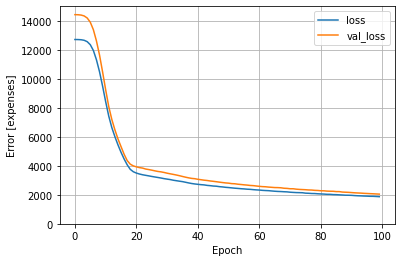

Model Evaluation:
9/9 [==============================] - 0s 2ms/step - loss: 2711.7107 - mean_absolute_error: 2711.7107 - mean_squared_error: 35029320.0000

----------------------------------------
FIT
Tolerance: 750
Range: [1297.014892578125, 2797.014892578125]

TRAINING
Loss: 1871.593017578125
Validation Loss: 2047.014892578125
Diff.: 175.421875 (Good Fit)

EVALUATION
Loss (Mean Absolute Error): 2711.710693359375
Challenge passed (mae < 3500): TRUE


In [31]:
# Data Preprocessing...

# 2.2. Use 80% of the data as the train_dataset and 20% of the data as the test_dataset.
train_dataset = df_clean.sample(frac=0.8, random_state=0)
test_dataset = df_clean.drop(train_dataset.index)

# 2.3. pop off the "expenses" column from these datasets to create new 
# datasets called train_labels and test_labels. Use these labels when 
# training your model.
train_features = train_dataset.copy()
train_labels = train_features.pop('expenses')
test_features = test_dataset.copy()
test_labels = test_features.pop('expenses')


# 3. Create Model and Train It - Regression with a Deep Neural Network (DNN)

# 3.1. Create preprocessing layer for model to normalize data
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(train_features))
# https://keras.io/api/layers/preprocessing_layers/numerical/normalization/

# 3.2. Create model
model = keras.Sequential([
    tf.keras.layers.Input(shape=(train_features.shape[1],)), # input layer (shape[1]=6 features)
    normalizer, # preprocessing layer for normalization
    tf.keras.layers.Dense(100, activation='relu'), # hidden layer 100 neurons
    tf.keras.layers.Dense(50, activation='relu'), # hidden layer 50 neurons
    tf.keras.layers.Dense(25, activation='relu'), # hidden layer 25 neurons
    tf.keras.layers.Dense(1) # output layer 1 neuron
])
# https://keras.io/guides/sequential_model/

model.summary()

# 3.3. Compile model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
              loss='mean_absolute_error',
              metrics=['mean_absolute_error', 'mean_squared_error'])

# 3.4. Train model
#%%time
history = model.fit(
    train_features, train_labels,
    batch_size=32, epochs=100, # (32,100), (70,100)
    validation_split=0.2, # (0.2) # calculate validation results on 20% of the training data
    #shuffle=True, steps_per_epoch=?, validation_Data=?, validation_steps=?,
    verbose=0)

# Plot loss and val_loss
plot_loss(history)
plt.show()

# Evaluate model (objective: mae < 3500)
print('Model Evaluation:')
loss, mae, mse = model.evaluate(test_features, test_labels, verbose=1)
[_, _, _, _, _, fit] = assess_training_loss(history, fit_tolerance=750)
test_results['dnn_model_1'] = [loss, mae, mse, fit]

# Print evaluation and training loss difference; print fit, training,
# evaluation stats and if challenge passed
print_stats(history, loss)


# For further model performance comparison to choose the best one

models_data['dnn_model_1'] = [ model, history, test_features, test_labels, fit ]

In [32]:
# Get stats from model training history
#show_history_as_dataframe(history).tail(1)

9/9 [==============================] - 0s 2ms/step


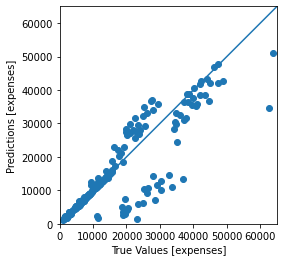

In [33]:
# Make predictions
test_predictions = model.predict(test_features).flatten()
plot_predictions(model, test_labels, test_predictions)

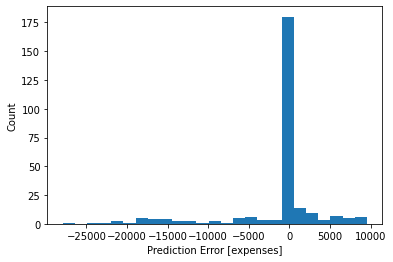

In [34]:
# Let’s take a look at the error distribution
plot_prediction_error_distribution(test_predictions, test_labels)

##### DNN Model 2

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 6)]               0         
                                                                 
 normalization_1 (Normalizat  (None, 6)                13        
 ion)                                                            
                                                                 
 dense_4 (Dense)             (None, 100)               700       
                                                                 
 dense_5 (Dense)             (None, 50)                5050      
                                                                 
 dense_6 (Dense)             (None, 25)                1275      
                                                                 
 dense_7 (Dense)             (None, 1)                 26        
                                                             

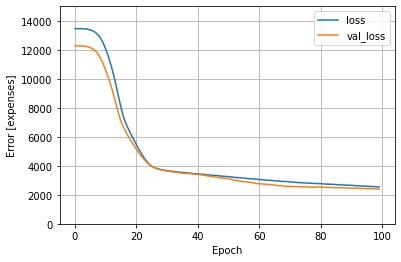

Model Evaluation:
9/9 [==============================] - 0s 2ms/step - loss: 2435.9053 - mean_absolute_error: 2435.9053 - mean_squared_error: 26978790.0000

----------------------------------------
FIT
Tolerance: 750
Range: [1655.954833984375, 3155.954833984375]

TRAINING
Loss: 2545.2841796875
Validation Loss: 2405.954833984375
Diff.: -139.329345703125 (Good Fit)

EVALUATION
Loss (Mean Absolute Error): 2435.9052734375
Challenge passed (mae < 3500): TRUE


In [35]:
# Data Preprocessing...

# 2.2. Split dataframe into features and labels
X = df_clean.iloc[:, 0:-1].values # features (all columns except 'expenses')
y = df_clean.iloc[:, -1:].values # labels (column 'expenses')

# 2.3. Split data (features and labels) into test (20%) and training sets (80%)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# 2.4. Since all columns already are in numeric format, will not need to convert any values

# 2.5. Create normalization layer to scale the dataset 
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(X_train))


# 3. Create Model and Train It
# 3.1. Create the layers for model
input_layer = tf.keras.Input(shape=(X.shape[1],))
normalization_layer = normalizer(input_layer)
dense_layer_1 = tf.keras.layers.Dense(100, activation='relu')(normalization_layer)
dense_layer_2 = tf.keras.layers.Dense(50, activation='relu')(dense_layer_1)
dense_layer_3 = tf.keras.layers.Dense(25, activation='relu')(dense_layer_2)
output = tf.keras.layers.Dense(1)(dense_layer_3)

# 3.2. Create model
model = tf.keras.Model(inputs=input_layer, outputs=output)

# 3.3. Compile model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='mean_absolute_error',
    metrics=['mean_absolute_error', 'mean_squared_error'])

model.summary()

# 3.4. Train model
history = model.fit(
    X_train, y_train,
    batch_size=60, epochs=100, # (10,30), (30,57), (60,100)
    validation_split=0.1, # (0.1)
    verbose=0)

# Plot loss and val_loss
plot_loss(history)
plt.show()

# Evaluate model (objective: mae < 3500)
print('Model Evaluation:')
loss, mae, mse = model.evaluate(X_test, y_test, verbose=1)
[_, _, _, _, _, fit] = assess_training_loss(history, fit_tolerance=750)
test_results['dnn_model_2'] = [loss, mae, mse, fit]

# Print evaluation and training loss difference; print fit, training,
# evaluation stats and if challenge passed
print_stats(history, loss)


# For further model performance comparison to choose the best one
models_data['dnn_model_2'] = [ model, history, X_test, y_test, fit ]

In [36]:
# Get stats from model training history
#show_history_as_dataframe(history)

9/9 [==============================] - 0s 2ms/step


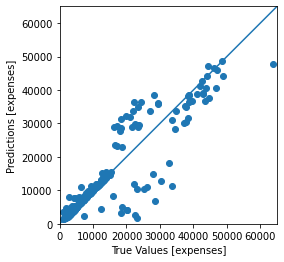

In [37]:
# Make predictions
y_predictions = model.predict(X_test).flatten()
plot_predictions(model, test_labels=y_test, test_predictions=y_predictions)

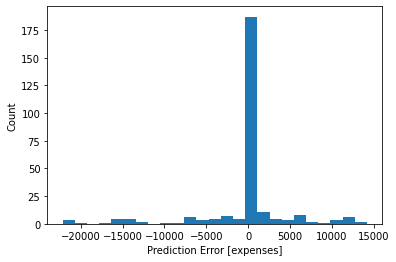

In [38]:
# Let’s take a look at the error distribution
plot_prediction_error_distribution(test_predictions=y_predictions.flatten(), test_labels=y_test.flatten())

##### **Aside:** Possible Hyper-Parameters

In [39]:
# Activation functions:
#'relu', 'sigmoid', 'softmax', 'softplus', 'softsign', 'tanh', 'selu'
#'elu', 'exponential'
# https://keras.io/api/layers/activations/

In [40]:
# Optimizers:
# 'sgd', 'rmsprop', 'adam', 'adamw', 'adadelta', 'adagrad', 
# 'adamax', 'adafactor', 'nadam', 'ftrl'
# https://keras.io/api/optimizers/

# Losses (for Regression):
# 'mean_squared_error', 'mean_absolute_error'
# 'mean_absolute_percentage_error', 'mean_squared_logarithmic_error'
# 'cosine_similarity'
# https://keras.io/api/losses/regression_losses/

# Metrics (for Regression):
# 'mean_squared_error', 'root_mean_squared_error', 'mean_absolute_error'
# 'mean_absolute_percentage_error', 'mean_squared_logarithmic_error',
# 'cosine_similarity', 'logcosh'
# https://keras.io/api/metrics/regression_metrics/

In [41]:
#-----------V2
#model = keras.Sequential()
#model.add(keras.Input(shape=(4,)))
#model.add(layers.Dense(2, activation="relu"))
##model.add(layers.Dense(2, activation="relu", input_shape=(4,)))
#model.add(layers.Dense(3, activation="relu"))
#model.add(layers.Dense(4))
#model.pop()
#print(len(model.layers))
#model.layers
#model.weights
#model.summary()

#### 4. Compare Models Performance And Choose Best Model

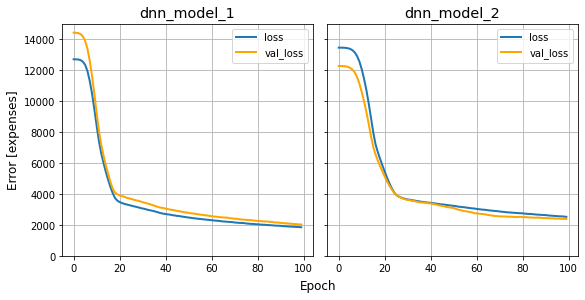

In [42]:
# Plot models evaluation history
plot_models_history(models_data)

            Loss [expenses] mean_absolute_error mean_squared_error  \
dnn_model_1     2711.710693         2711.710693         35029320.0   
dnn_model_2     2435.905273         2435.905273         26978790.0   

            training_fit  
dnn_model_1     Good Fit  
dnn_model_2     Good Fit  



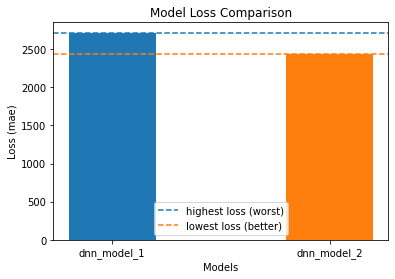

In [43]:
# Compare test results in dataframe format
col_names = ['Loss [expenses]', 'mean_absolute_error', 'mean_squared_error', 'training_fit']
print(pd.DataFrame(test_results, index=col_names).T) # 'T' stands for Transpose

# Plot models comparison
print()
plot_models_comparison(test_results)

In [44]:
# Select model with best performance
best_model_key = min(test_results.items(), key=lambda x: x[1][1])[0]

# Assign best model data to adequate variables for FCC to test the model
[model, history, test_dataset, test_labels, fit] = models_data[best_model_key]

print('Best Model: {best} ({training_fit})'.format(best=best_model_key, training_fit=fit))

Best Model: dnn_model_2 (Good Fit)


#### 5. Make A Prediction To Check Best Model Accuracy

##### Auxiliary Functions

In [45]:
# Auxiliary Functions

# Translate data (for categorical features/columns):
def translate_sex(sex):
  if sex == 1: return 'female'
  elif sex == 2: return 'male'
  else: ''
def translate_region(region):
  if region == 1: return 'northeast'
  elif region == 2: return 'northwest'
  elif region == 3: return 'southeast'
  elif region == 4: return 'southwest'
  else: ''

# Query dataframe for similar data
def query_dataframe_for_similar_data(age, sex, bmi, children, smoker, region):
  queried_data = df_clean.query(
      'age >= {} and age <= {}'.format(age-2, age+2)).query(
      'sex == {}'.format(sex)).query(
      'bmi >= {} and bmi <= {}'.format(bmi-10, bmi+10)).query(
      'children == {}'.format(children)).query(
      'smoker == {}'.format(smoker)).query(
      'region == {}'.format(region))
  queried_data['sex'] = [translate_sex(d) for d in queried_data['sex'].values]
  queried_data['region'] = [translate_region(d) for d in queried_data['region'].values]
  queried_data = queried_data.sort_values(by=['expenses'], ascending=False)
  return queried_data

##### Predict and Check

In [50]:
# Choose query values:
age = 50; sex = 1; bmi = 35.0; children = 2; smoker = 0; region = 1

# Query features and possible values
# age(18-64) sex(1,2) bmi(16.0-53.1) children(0,1,2,3,4,5) smoker(0,1) region(1,2,3,4)
#-------------------------------------------------------------------

# Create dataframe with query data
data = pd.DataFrame(data=[[age,sex,bmi,children,smoker,region]], columns=test_features.columns)

# Use best model or choose a model from models_data
model_pred = models_data[best_model_key][0]
#model_pred = models_data['dnn_model_1'][0]

# Predict expenses
pred_data = data.copy()
pred_data['expenses_prediction'] = model_pred.predict(data).flatten()[0]
# Translate categorical features values
pred_data['sex'] = translate_sex(data['sex'].values[0])
pred_data['region'] = translate_region(data['region'].values[0])

print('\nPREDICTION:'); print(pred_data); print()


# Check prediction by querying dataframe for similar data
queried_data = ''
if df_clean.shape[1] == 7:
  queried_data = query_dataframe_for_similar_data(age, sex, bmi, children, smoker, region)
#queried_data.value_counts().count()

print('DATAFRAME QUERY (SIMILAR DATA):'); print(queried_data.head(5))

1/1 [==============================] - 0s 58ms/step

PREDICTION:
   age     sex   bmi  children  smoker     region  expenses_prediction
0   50  female  35.0         2       0  northeast         10957.382812

DATAFRAME QUERY (SIMILAR DATA):
      age     sex   bmi  children  smoker     region  expenses
405    52  female  38.4         2       0  northeast  11396.90
1264   49  female  33.3         2       0  northeast  10370.91
360    48  female  32.3         2       0  northeast  10043.25


#### Save Model / Reload Model

In [47]:
# Save model (if you are happy with it)
#model.save('dnn_model')

In [48]:
# Reload model
#reloaded = tf.keras.models.load_model('dnn_model')

#test_results['reloaded'] = reloaded.evaluate(
#    test_features, test_labels, verbose=0)

#pd.DataFrame(test_results, index=['Mean absolute error [expenses]']).T

### 9. Test Your Model (FCC)

9/9 - 0s - loss: 2435.9053 - mean_absolute_error: 2435.9053 - mean_squared_error: 26978790.0000 - 35ms/epoch - 4ms/step
Testing set Mean Abs Error: 2435.91 expenses
You passed the challenge. Great job!
9/9 [==============================] - 0s 2ms/step


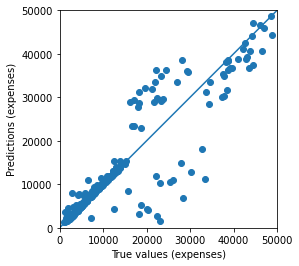

In [49]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)
